In [8]:
import pandas as pd
import sys
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [9]:
data = pd.read_csv("../data/Crop_recommendation.csv")
print("Dataset loaded successfully!")
print(f"Shape: {data.shape}")
data.head()

Dataset loaded successfully!
Shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Basic Data Information
print("=== BASIC DATA INFORMATION ===")
print(f"Dataset Shape: {data.shape}")
print(f"Memory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


=== TARGET VARIABLE ANALYSIS ===
Crop Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Number of unique crops: 22
Most common crop: rice (100 samples)
Least common crop: coffee (100 samples)


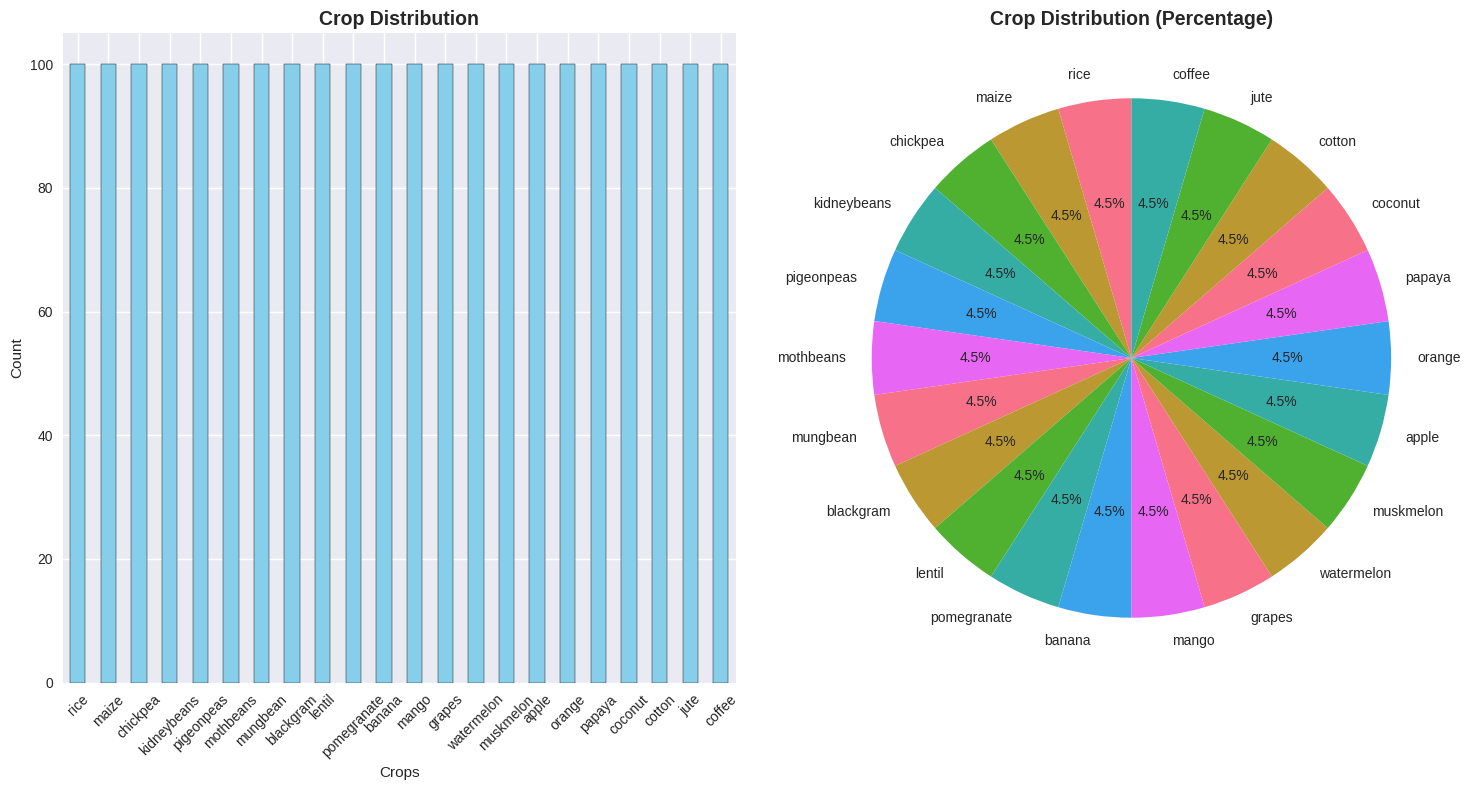

In [10]:
# Target Variable Analysis
print("=== TARGET VARIABLE ANALYSIS ===")
label_counts = data['label'].value_counts()
print("Crop Distribution:")
print(label_counts)
print(f"\nNumber of unique crops: {data['label'].nunique()}")
print(f"Most common crop: {label_counts.index[0]} ({label_counts.iloc[0]} samples)")
print(f"Least common crop: {label_counts.index[-1]} ({label_counts.iloc[-1]} samples)")

# Visualize crop distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Crop Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Crops')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Crop Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
# Descriptive Statistics
print("=== DESCRIPTIVE STATISTICS ===")
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
print("Numerical Features Summary:")
print(data[numeric_features].describe())

# Check for potential outliers using IQR method
print("\n=== OUTLIER DETECTION (IQR Method) ===")
outlier_counts = {}
for feature in numeric_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")

=== DESCRIPTIVE STATISTICS ===
Numerical Features Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
ma

=== FEATURE DISTRIBUTION ANALYSIS ===


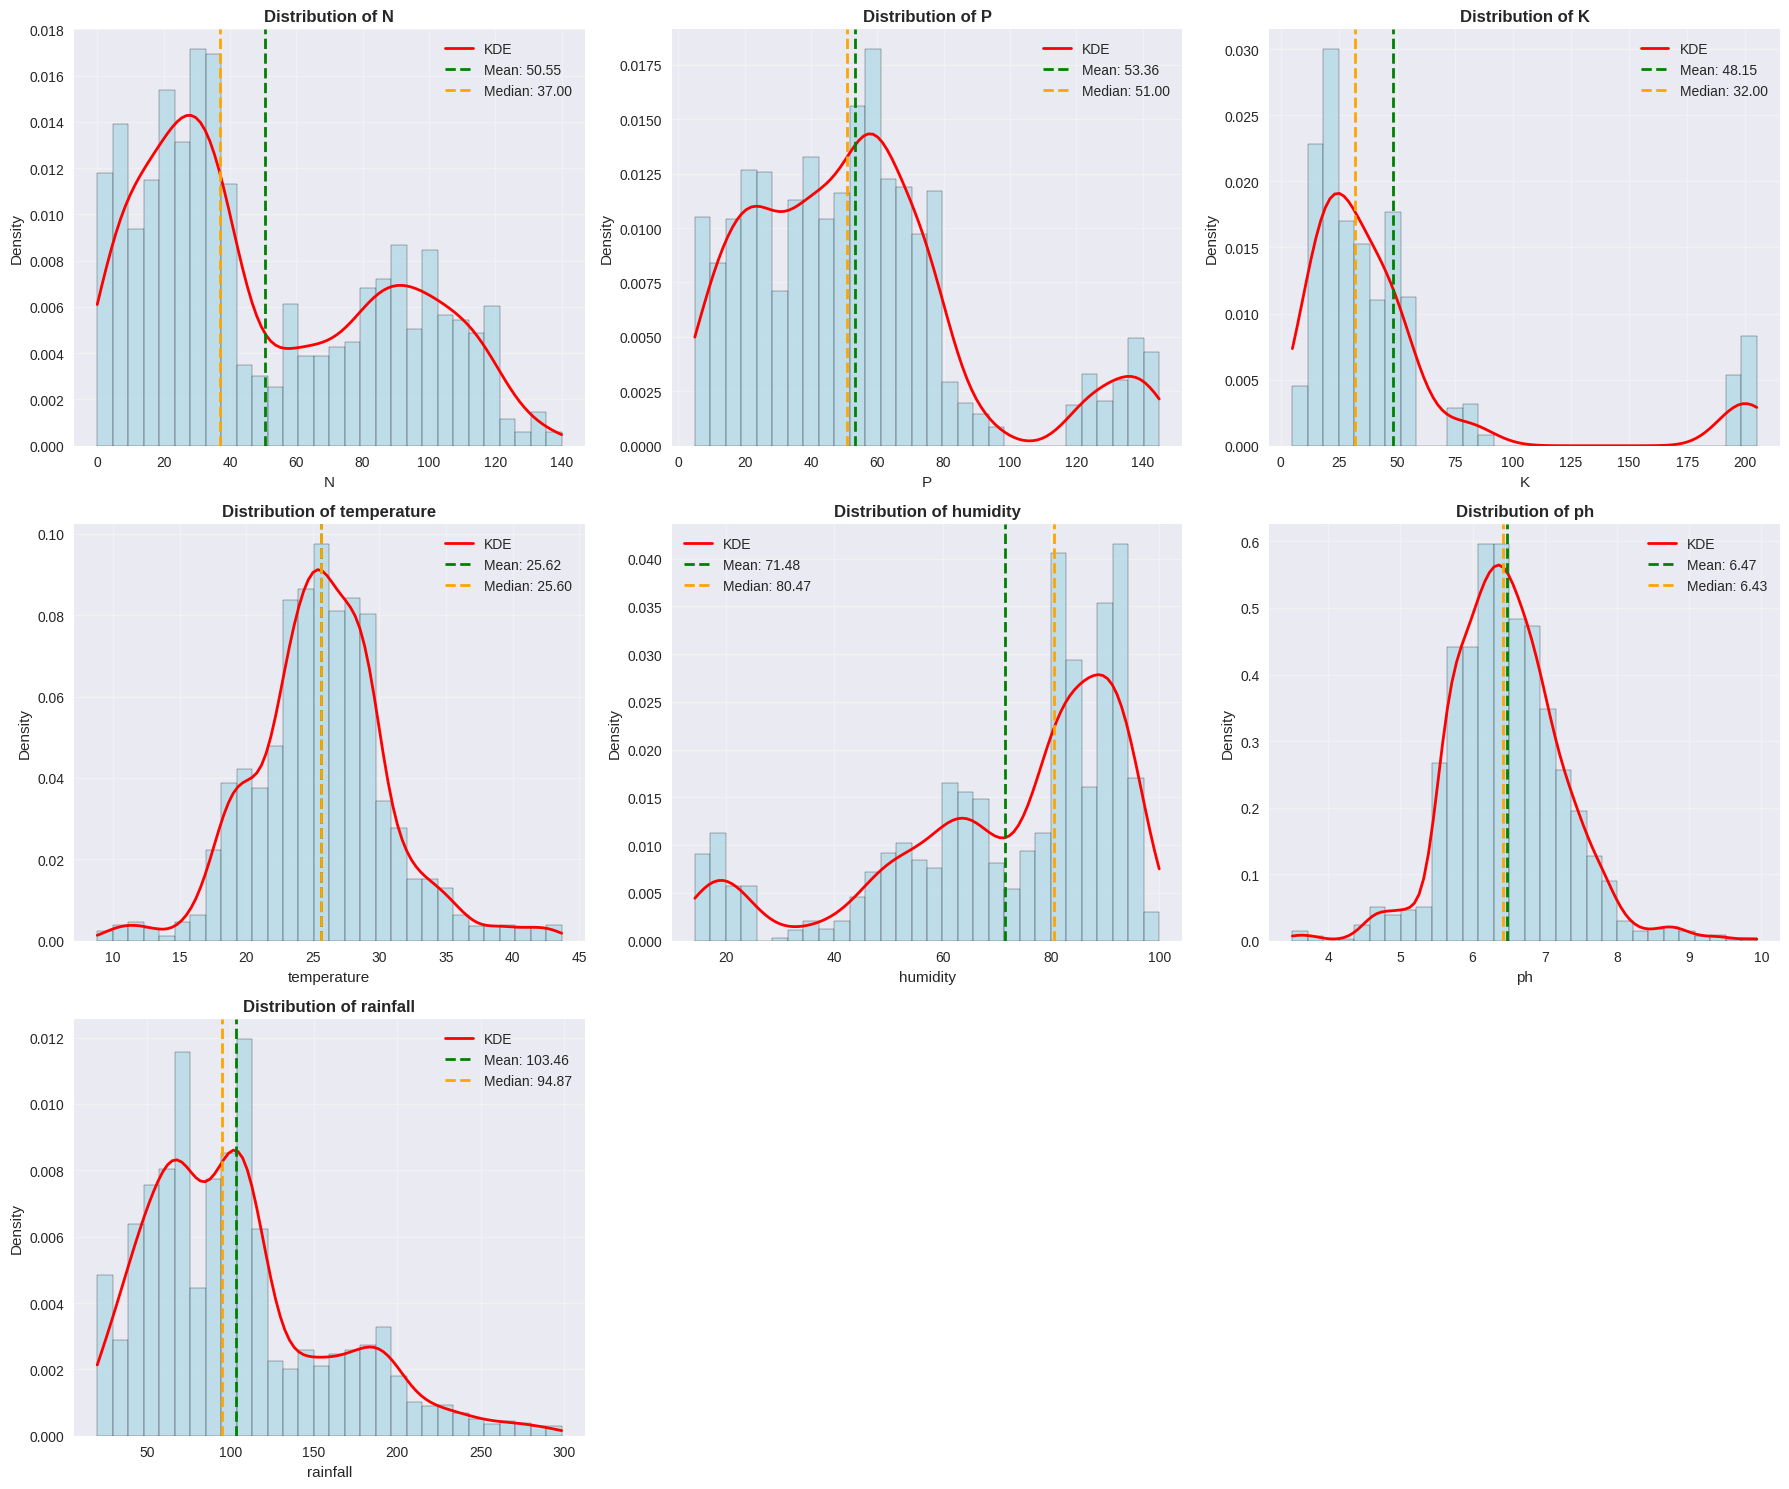

In [12]:
# Feature Distribution Analysis
print("=== FEATURE DISTRIBUTION ANALYSIS ===")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    # Histogram with KDE
    axes[i].hist(data[feature], bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
    
    # Add KDE line
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data[feature])
    x_range = np.linspace(data[feature].min(), data[feature].max(), 100)
    axes[i].plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    # Add vertical lines for mean and median
    axes[i].axvline(data[feature].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[i].axvline(data[feature].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data[feature].median():.2f}')
    
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove extra subplots
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===
Correlation Matrix:
                 N      P      K  temperature  humidity     ph  rainfall
N            1.000 -0.231 -0.141        0.027     0.191  0.097     0.059
P           -0.231  1.000  0.736       -0.128    -0.119 -0.138    -0.064
K           -0.141  0.736  1.000       -0.160     0.191 -0.170    -0.053
temperature  0.027 -0.128 -0.160        1.000     0.205 -0.018    -0.030
humidity     0.191 -0.119  0.191        0.205     1.000 -0.008     0.094
ph           0.097 -0.138 -0.170       -0.018    -0.008  1.000    -0.109
rainfall     0.059 -0.064 -0.053       -0.030     0.094 -0.109     1.000


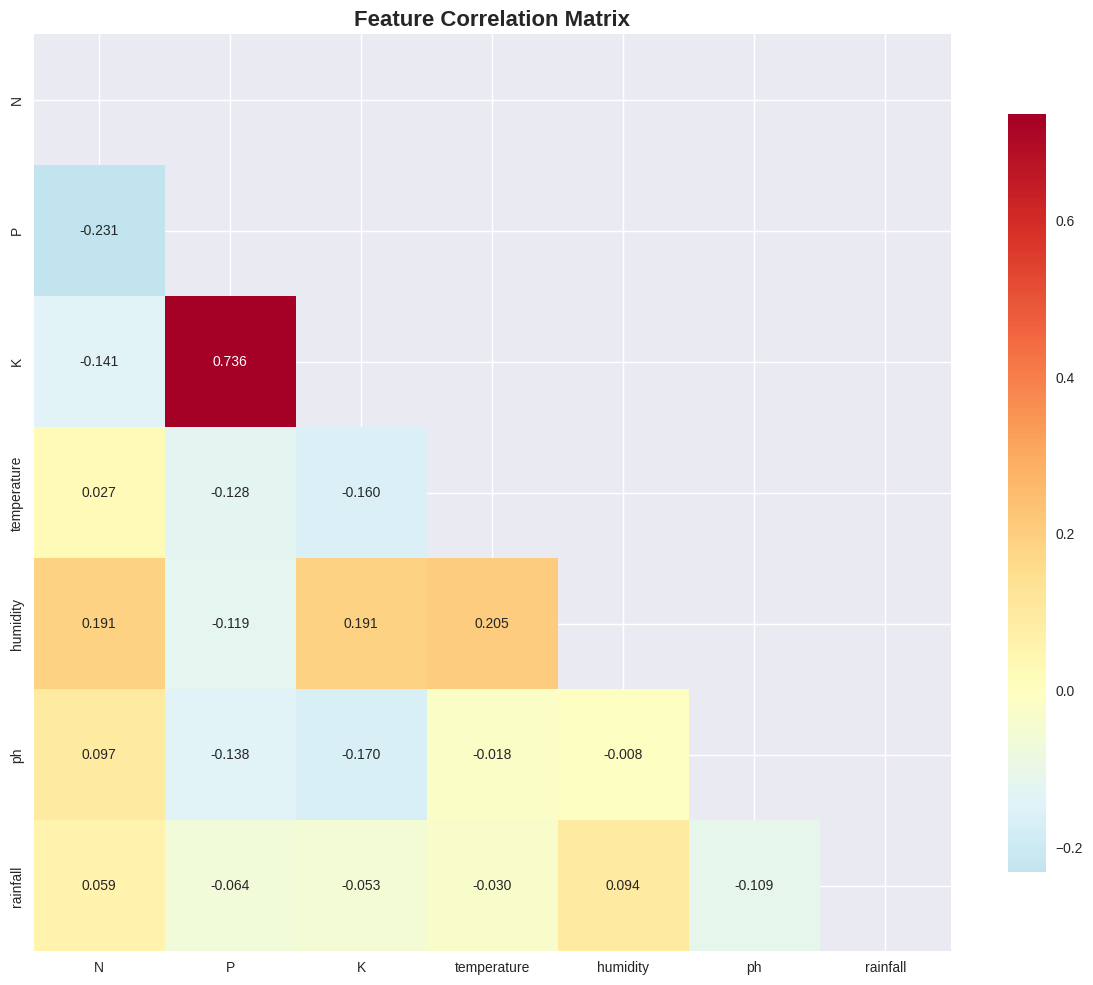


=== HIGHLY CORRELATED FEATURE PAIRS ===
P - K: 0.736


In [13]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = data[numeric_features].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0, 
            square=True,
            mask=mask,
            cbar_kws={"shrink": 0.8},
            fmt='.3f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated pairs
print("\n=== HIGHLY CORRELATED FEATURE PAIRS ===")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Threshold for significant correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated feature pairs found (threshold > 0.3)")

In [14]:
# Crop-wise Feature Analysis
print("=== CROP-WISE FEATURE ANALYSIS ===")

# Calculate mean values for each crop
crop_means = data.groupby('label')[numeric_features].mean().round(2)
print("Average feature values by crop:")
print(crop_means)

# Find crops with extreme values
print("\n=== CROPS WITH EXTREME FEATURE VALUES ===")
for feature in numeric_features:
    max_crop = crop_means[feature].idxmax()
    min_crop = crop_means[feature].idxmin()
    max_val = crop_means[feature].max()
    min_val = crop_means[feature].min()
    print(f"{feature}:")
    print(f"  Highest: {max_crop} ({max_val})")
    print(f"  Lowest: {min_crop} ({min_val})")
    print()

=== CROP-WISE FEATURE ANALYSIS ===
Average feature values by crop:
                  N       P       K  temperature  humidity    ph  rainfall
label                                                                     
apple         20.80  134.22  199.89        22.63     92.33  5.93    112.65
banana       100.23   82.01   50.05        27.38     80.36  5.98    104.63
blackgram     40.02   67.47   19.24        29.97     65.12  7.13     67.88
chickpea      40.09   67.79   79.92        18.87     16.86  7.34     80.06
coconut       21.98   16.93   30.59        27.41     94.84  5.98    175.69
coffee       101.20   28.74   29.94        25.54     58.87  6.79    158.07
cotton       117.77   46.24   19.56        23.99     79.84  6.91     80.40
grapes        23.18  132.53  200.11        23.85     81.88  6.03     69.61
jute          78.40   46.86   39.99        24.96     79.64  6.73    174.79
kidneybeans   20.75   67.54   20.05        20.12     21.61  5.75    105.92
lentil        18.77   68.36   19.

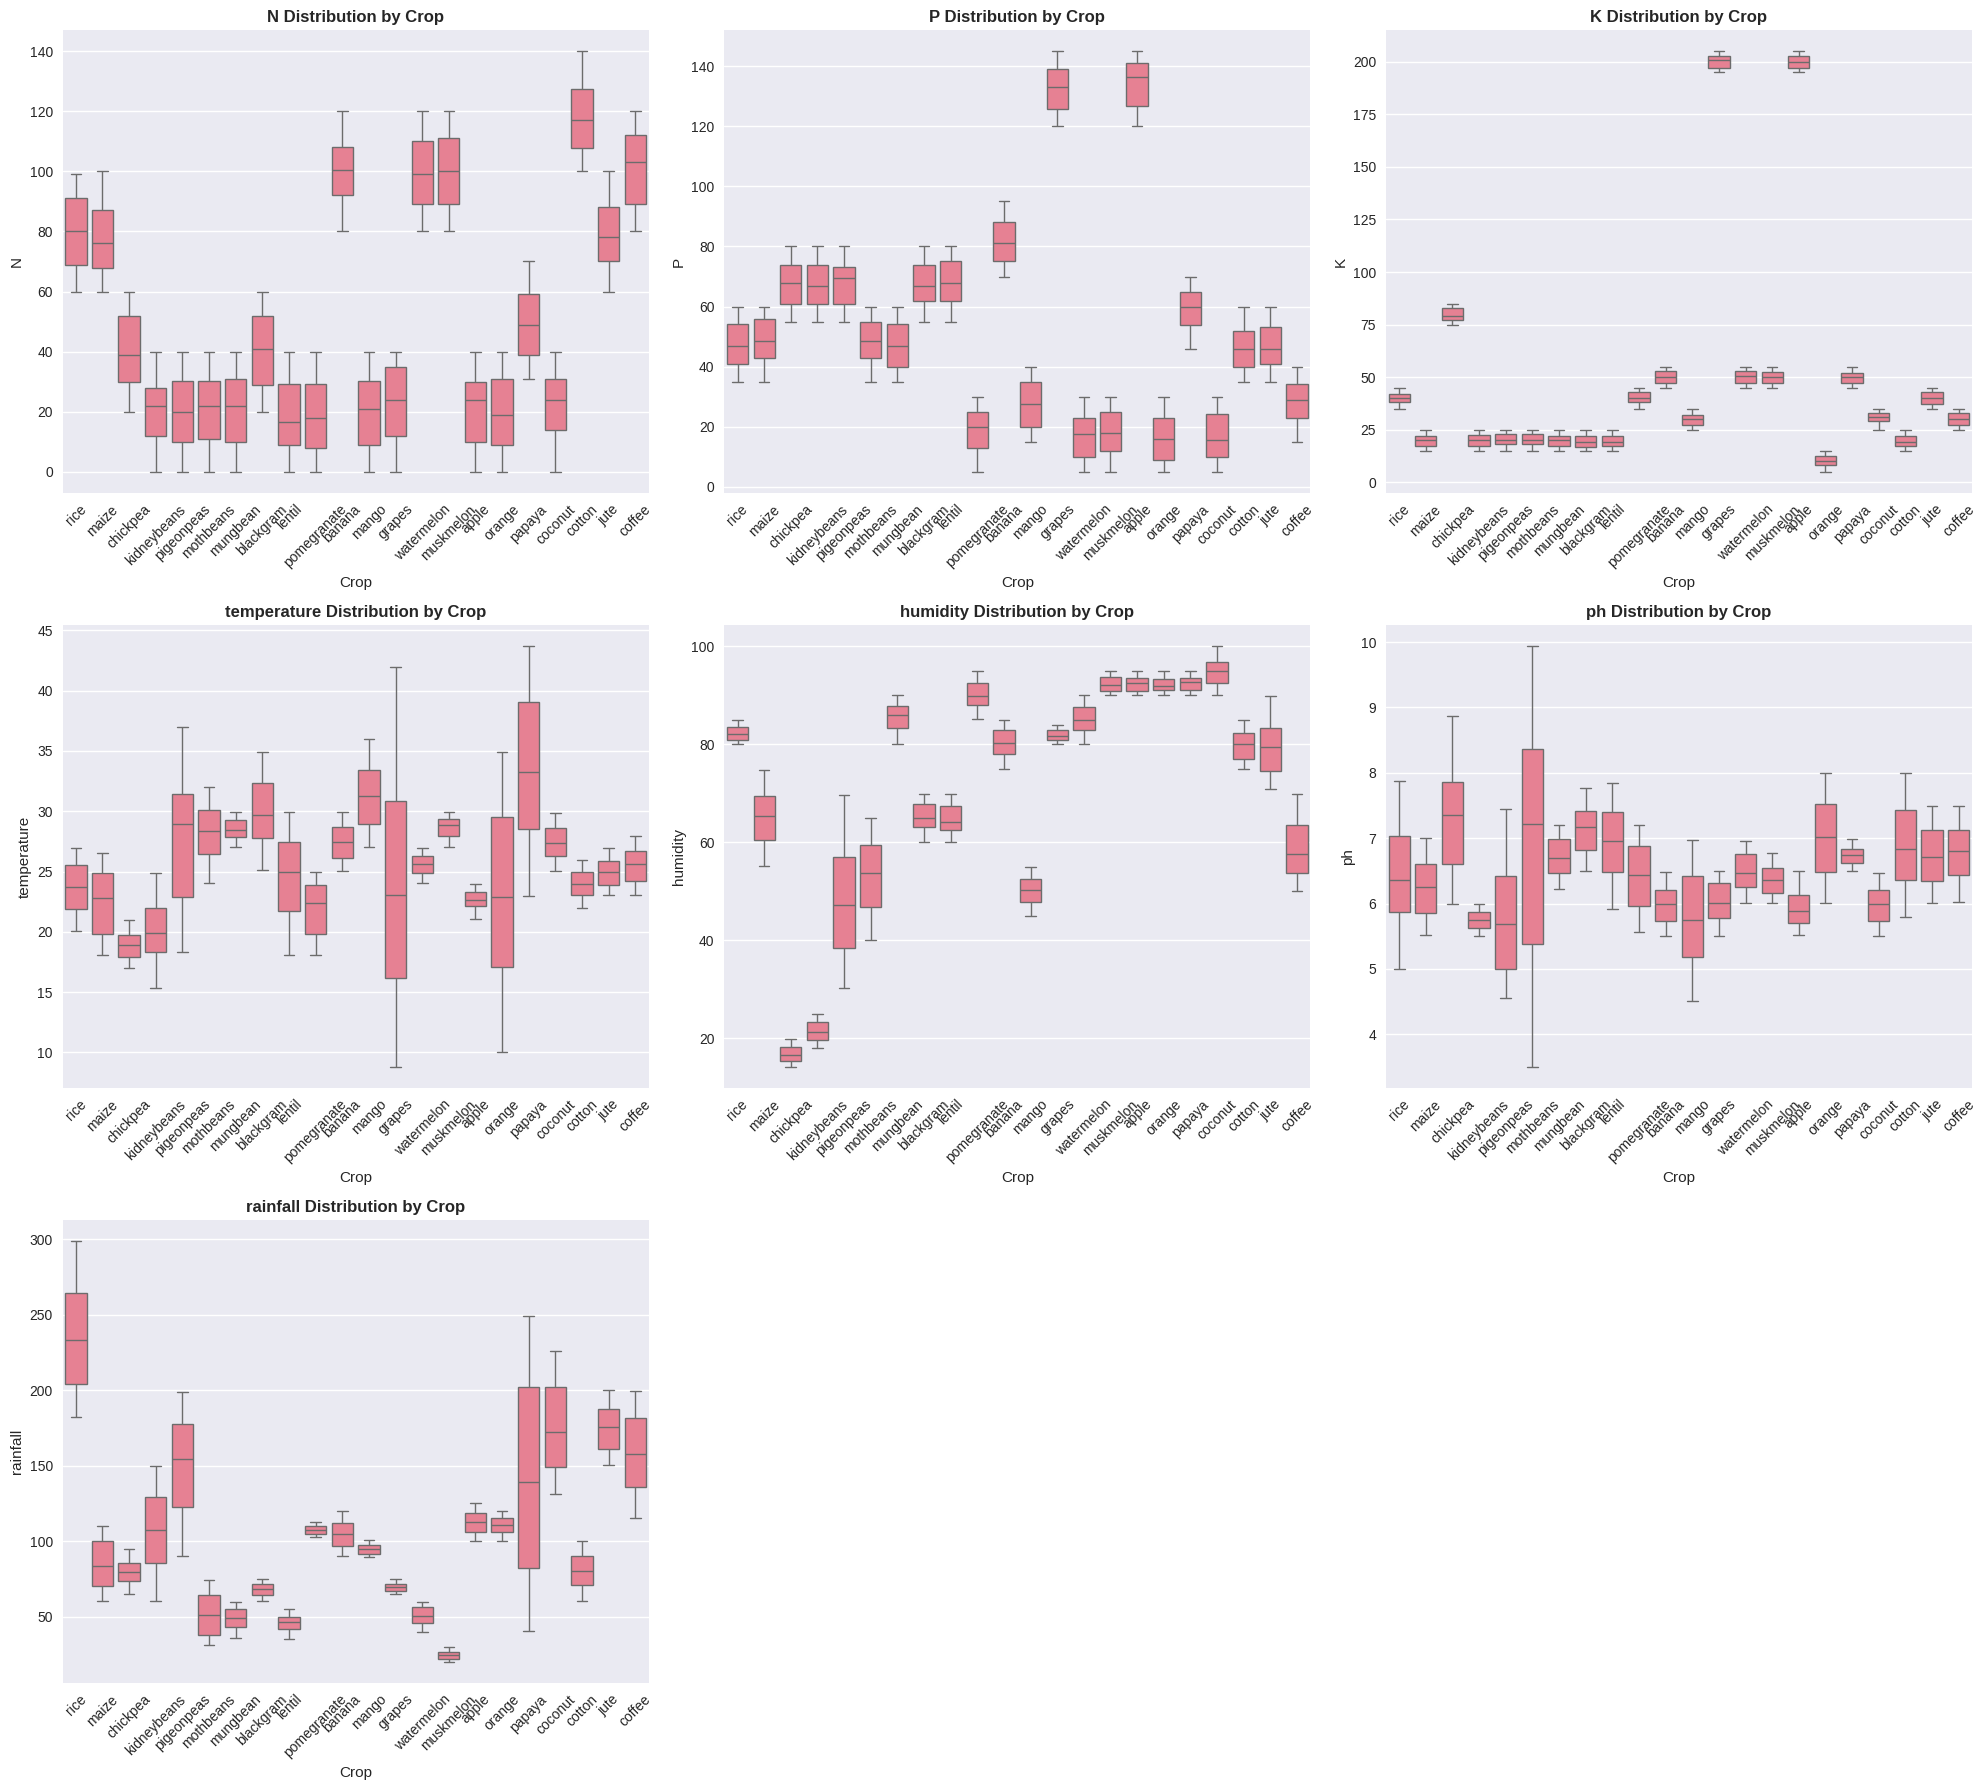

In [15]:
# Feature Comparison by Crops - Box plots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=data, x='label', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Crop', fontweight='bold')
    axes[i].set_xlabel('Crop')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra subplots
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Feature Engineering - Create new features
print("=== FEATURE ENGINEERING ===")
data_engineered = data.copy()

# NPK ratio features
data_engineered['NPK_sum'] = data_engineered['N'] + data_engineered['P'] + data_engineered['K']
data_engineered['NP_ratio'] = data_engineered['N'] / (data_engineered['P'] + 0.001)  # Avoid division by zero
data_engineered['NK_ratio'] = data_engineered['N'] / (data_engineered['K'] + 0.001)
data_engineered['PK_ratio'] = data_engineered['P'] / (data_engineered['K'] + 0.001)

# Temperature-Humidity interaction
data_engineered['temp_humidity_interaction'] = data_engineered['temperature'] * data_engineered['humidity']

# Classify pH levels
def classify_ph(ph):
    if ph < 6.0:
        return 'Acidic'
    elif ph <= 7.5:
        return 'Neutral'
    else:
        return 'Alkaline'

data_engineered['ph_category'] = data_engineered['ph'].apply(classify_ph)

# Classify rainfall levels
def classify_rainfall(rainfall):
    if rainfall < 100:
        return 'Low'
    elif rainfall <= 200:
        return 'Medium'
    else:
        return 'High'

data_engineered['rainfall_category'] = data_engineered['rainfall'].apply(classify_rainfall)

print("New features created:")
new_features = ['NPK_sum', 'NP_ratio', 'NK_ratio', 'PK_ratio', 'temp_humidity_interaction', 'ph_category', 'rainfall_category']
print(new_features)
print(f"\nDataset shape after feature engineering: {data_engineered.shape}")

=== FEATURE ENGINEERING ===
New features created:
['NPK_sum', 'NP_ratio', 'NK_ratio', 'PK_ratio', 'temp_humidity_interaction', 'ph_category', 'rainfall_category']

Dataset shape after feature engineering: (2200, 15)


=== CATEGORICAL FEATURE ANALYSIS ===


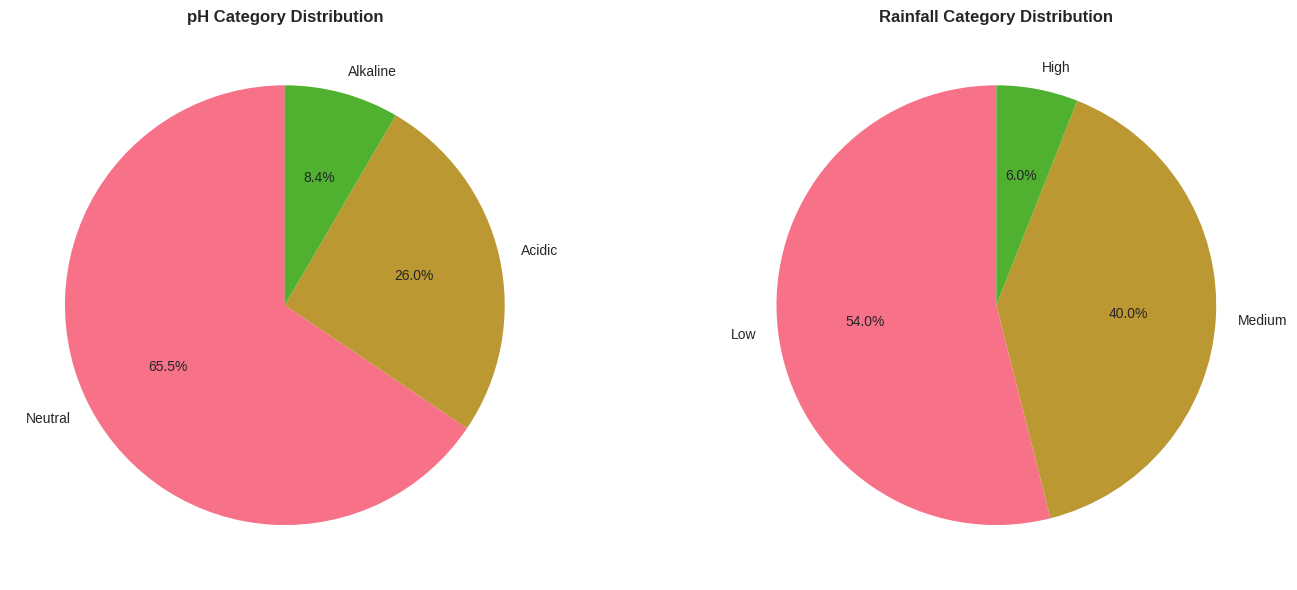


=== pH CATEGORY BY CROP ===
ph_category  Acidic  Alkaline  Neutral
label                                 
apple            60         0       40
banana           50         0       50
blackgram         0        20       80
chickpea          2        44       54
coconut          50         0       50
coffee            0         0      100
cotton            5        21       74
grapes           49         0       51
jute              0         0      100
kidneybeans     100         0        0
lentil            4        19       77
maize            34         0       66
mango            60         0       40
mothbeans        39        45       16
mungbean          0         0      100
muskmelon         0         0      100
orange            0        26       74
papaya            0         0      100
pigeonpeas       61         0       39
pomegranate      26         0       74
rice             33        10       57
watermelon        0         0      100

=== RAINFALL CATEGORY BY CROP ===


In [17]:
# Analyze new categorical features
print("=== CATEGORICAL FEATURE ANALYSIS ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# pH category distribution
ph_counts = data_engineered['ph_category'].value_counts()
axes[0].pie(ph_counts.values, labels=ph_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('pH Category Distribution', fontweight='bold')

# Rainfall category distribution
rainfall_counts = data_engineered['rainfall_category'].value_counts()
axes[1].pie(rainfall_counts.values, labels=rainfall_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Rainfall Category Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# Cross-tabulation of pH and rainfall categories by crop
print("\n=== pH CATEGORY BY CROP ===")
ph_crop_crosstab = pd.crosstab(data_engineered['label'], data_engineered['ph_category'])
print(ph_crop_crosstab)

print("\n=== RAINFALL CATEGORY BY CROP ===")
rainfall_crop_crosstab = pd.crosstab(data_engineered['label'], data_engineered['rainfall_category'])
print(rainfall_crop_crosstab)

In [19]:
print("=== ADVANCED STATISTICAL ANALYSIS ===")

# Variance analysis
print("Feature Variance Analysis:")
variances = data[numeric_features].var().sort_values(ascending=False)
print(variances)

# Coefficient of Variation (CV)
print("\nCoefficient of Variation (CV = std/mean):")
cv = (data[numeric_features].std() / data[numeric_features].mean()).sort_values(ascending=False)
print(cv.round(3))

# Skewness and Kurtosis
from scipy import stats
print("\nSkewness and Kurtosis:")
for feature in numeric_features:
    skewness = stats.skew(data[feature])
    kurtosis = stats.kurtosis(data[feature])
    print(f"{feature}: Skewness = {skewness:.3f}, Kurtosis = {kurtosis:.3f}")

=== ADVANCED STATISTICAL ANALYSIS ===
Feature Variance Analysis:
rainfall       3020.424469
K              2565.212869
N              1362.889537
P              1088.068460
humidity        495.677307
temperature      25.641550
ph                0.598980
dtype: float64

Coefficient of Variation (CV = std/mean):
K              1.052
N              0.730
P              0.618
rainfall       0.531
humidity       0.311
temperature    0.198
ph             0.120
dtype: float64

Skewness and Kurtosis:
N: Skewness = 0.509, Kurtosis = -1.059
P: Skewness = 1.010, Kurtosis = 0.856
K: Skewness = 2.374, Kurtosis = 4.437
temperature: Skewness = 0.185, Kurtosis = 1.227
humidity: Skewness = -1.091, Kurtosis = 0.299
ph: Skewness = 0.284, Kurtosis = 1.649
rainfall: Skewness = 0.965, Kurtosis = 0.603


=== PAIRWISE FEATURE RELATIONSHIPS ===


<Figure size 1600x1200 with 0 Axes>

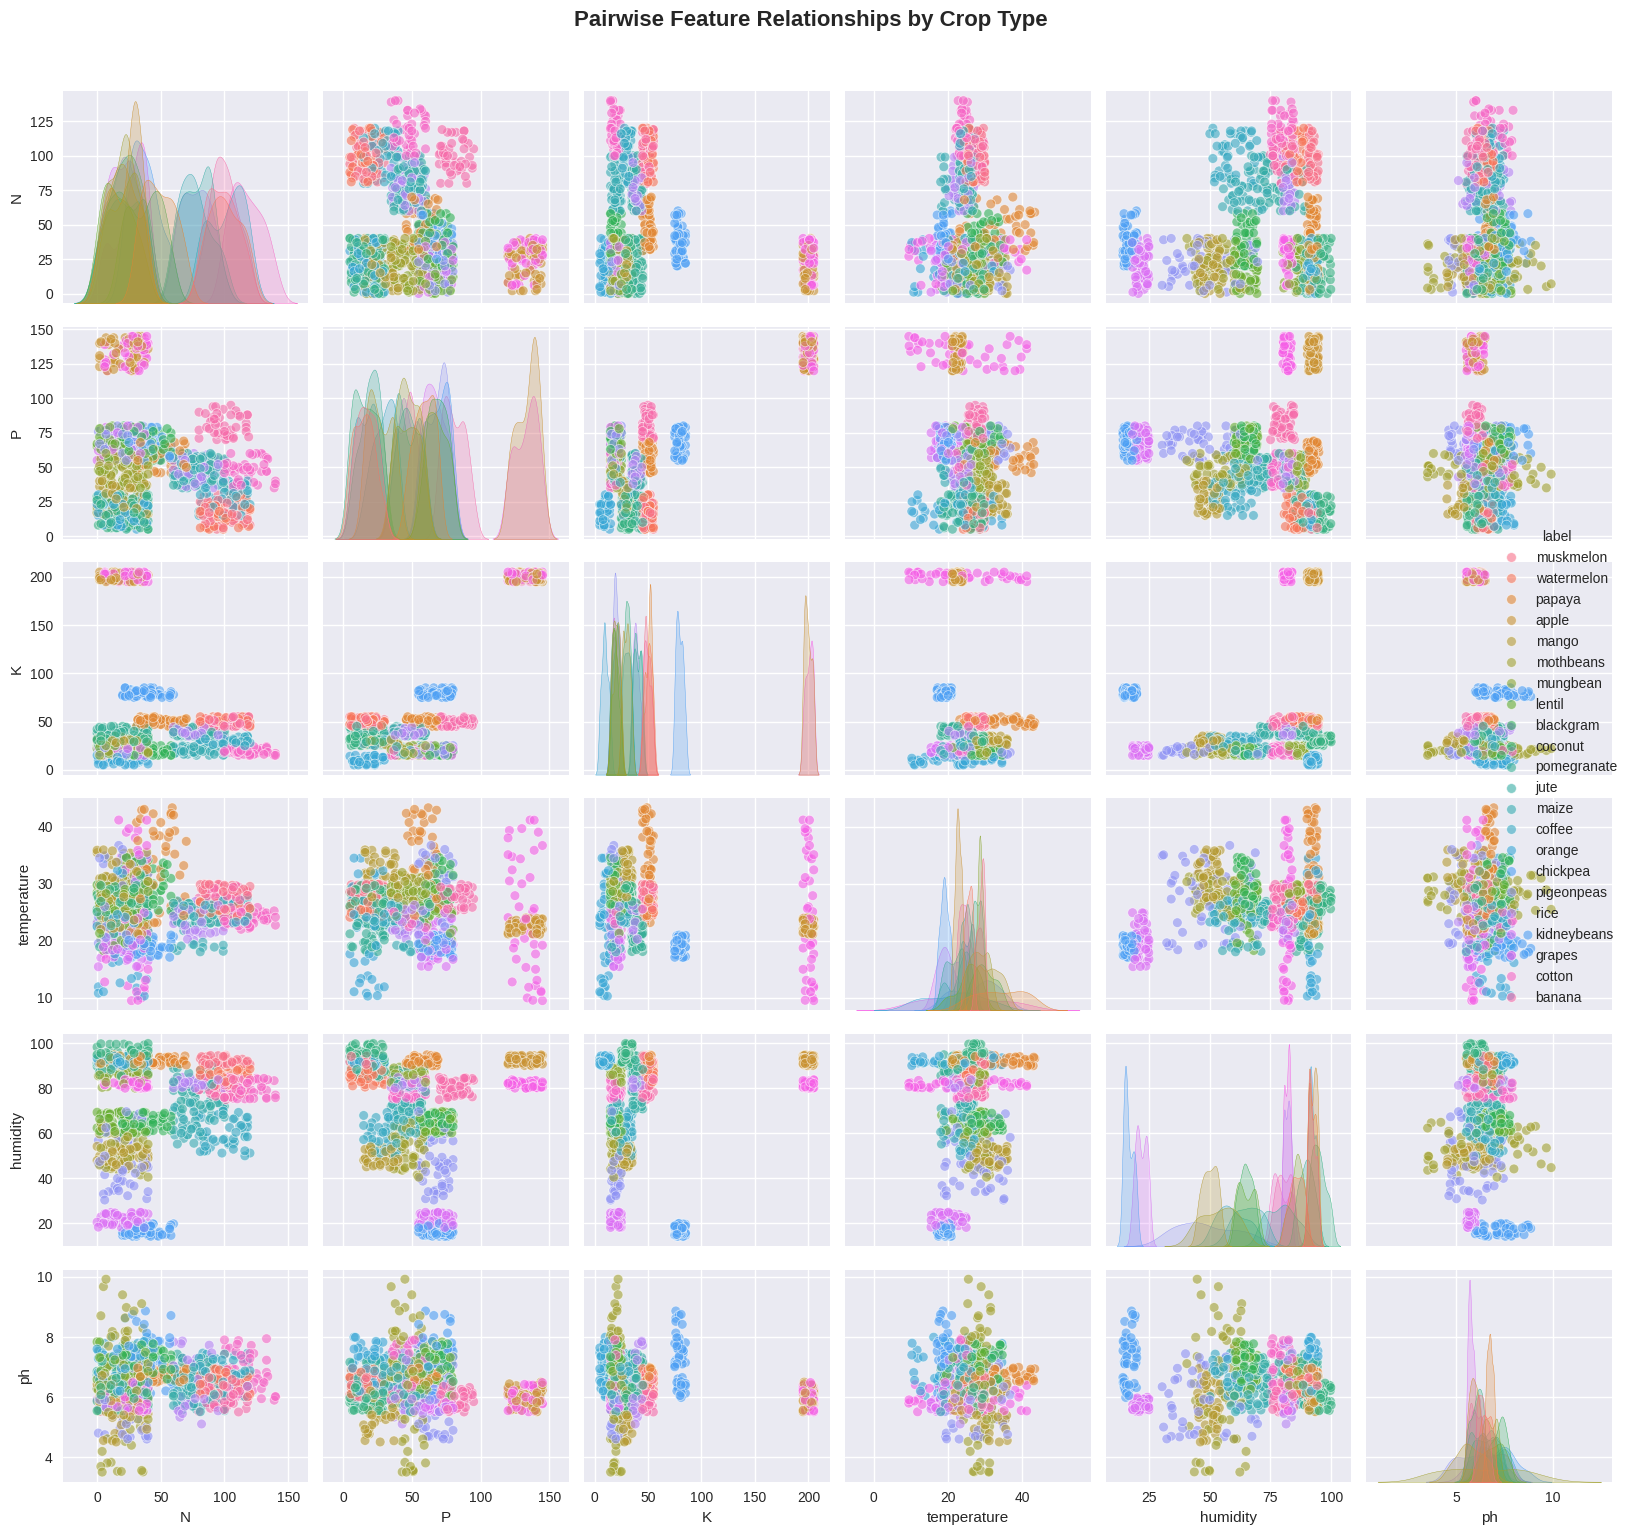

In [20]:
# Pairwise Feature Relationships
print("=== PAIRWISE FEATURE RELATIONSHIPS ===")

# Create a pairplot for selected features
selected_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph']
sample_data = data[selected_features + ['label']].sample(n=min(1000, len(data)), random_state=42)

plt.figure(figsize=(16, 12))
sns.pairplot(sample_data, hue='label', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Feature Relationships by Crop Type', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===
Feature Importance (Random Forest):
       feature  importance
6     rainfall    0.225676
4     humidity    0.215976
2            K    0.177675
1            P    0.152107
0            N    0.101705
3  temperature    0.073685
5           ph    0.053175
Feature Importance (Random Forest):
       feature  importance
6     rainfall    0.225676
4     humidity    0.215976
2            K    0.177675
1            P    0.152107
0            N    0.101705
3  temperature    0.073685
5           ph    0.053175


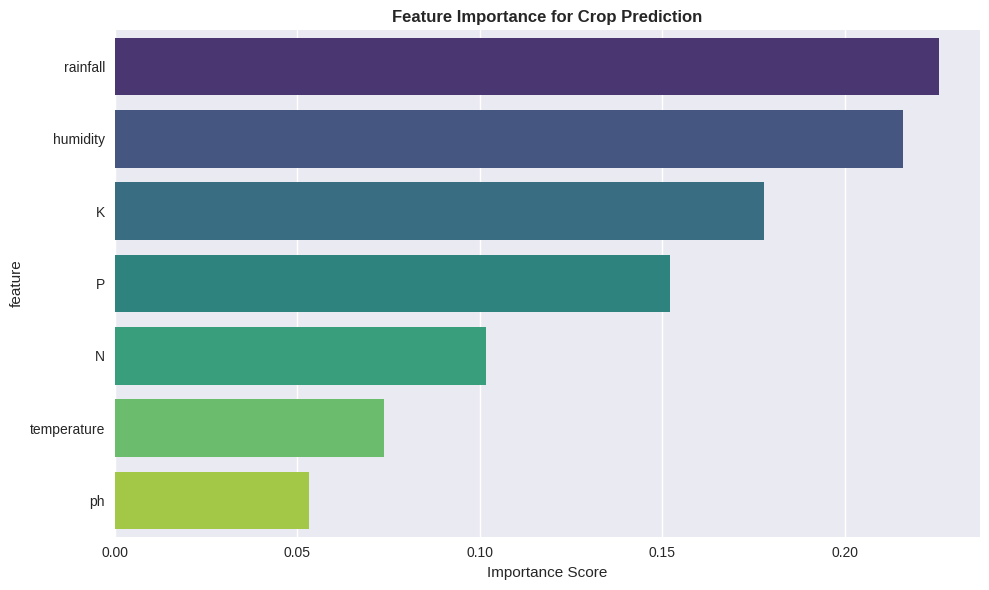

In [21]:
# Feature Importance using Random Forest
print("=== FEATURE IMPORTANCE ANALYSIS ===")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for feature importance
X = data[numeric_features]
y = data['label']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': numeric_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Crop Prediction', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [22]:
# Climate and Soil Condition Analysis
print("=== CLIMATE AND SOIL CONDITION ANALYSIS ===")

# Group crops by similar growing conditions
# Temperature preferences
temp_groups = {
    'Cool': data[data['temperature'] < 25]['label'].unique(),
    'Moderate': data[(data['temperature'] >= 25) & (data['temperature'] < 30)]['label'].unique(),
    'Warm': data[data['temperature'] >= 30]['label'].unique()
}

print("Crops by Temperature Preference:")
for temp_type, crops in temp_groups.items():
    print(f"{temp_type} temperature crops: {list(crops)}")

# Humidity preferences
humidity_groups = {
    'Low': data[data['humidity'] < 70]['label'].unique(),
    'Medium': data[(data['humidity'] >= 70) & (data['humidity'] < 85)]['label'].unique(),
    'High': data[data['humidity'] >= 85]['label'].unique()
}

print("\nCrops by Humidity Preference:")
for humidity_type, crops in humidity_groups.items():
    print(f"{humidity_type} humidity crops: {list(crops)}")

# NPK requirements
npk_analysis = data.groupby('label')[['N', 'P', 'K']].mean()
npk_analysis['total_npk'] = npk_analysis.sum(axis=1)
npk_analysis = npk_analysis.sort_values('total_npk', ascending=False)

print("\nCrops by NPK Requirements (sorted by total NPK):")
print(npk_analysis.round(2))

=== CLIMATE AND SOIL CONDITION ANALYSIS ===
Crops by Temperature Preference:
Cool temperature crops: ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'lentil', 'pomegranate', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'cotton', 'jute', 'coffee']
Moderate temperature crops: ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
Warm temperature crops: ['pigeonpeas', 'mothbeans', 'blackgram', 'mango', 'grapes', 'orange', 'papaya']

Crops by Humidity Preference:
Low humidity crops: ['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'blackgram', 'lentil', 'mango', 'coffee']
Medium humidity crops: ['rice', 'maize', 'mungbean', 'banana', 'grapes', 'watermelon', 'cotton', 'jute']
High humidity crops: ['mungbean', 'pomegranate', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'jute']

Crops b

In [23]:
# Final Summary and Insights
print("=== DATA ANALYSIS SUMMARY AND INSIGHTS ===")
print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(data):,}")
print(f"   - Number of crops: {data['label'].nunique()}")
print(f"   - Features: {len(numeric_features)} numerical")
print(f"   - No missing values: {data.isnull().sum().sum() == 0}")
print(f"   - No duplicate rows: {data.duplicated().sum() == 0}")

print("\n2. KEY FINDINGS:")
print(f"   - Most diverse crop: {label_counts.index[0]} ({label_counts.iloc[0]} samples)")
print(f"   - Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"   - Highest variance feature: {variances.index[0]}")

print("\n3. CROP CHARACTERISTICS:")
high_temp_crops = data[data['temperature'] > data['temperature'].quantile(0.75)]['label'].unique()
low_temp_crops = data[data['temperature'] < data['temperature'].quantile(0.25)]['label'].unique()
print(f"   - Heat-loving crops: {list(high_temp_crops)}")
print(f"   - Cool-weather crops: {list(low_temp_crops)}")

high_npk_crops = npk_analysis.head(3).index.tolist()
low_npk_crops = npk_analysis.tail(3).index.tolist()
print(f"   - High NPK requirement: {high_npk_crops}")
print(f"   - Low NPK requirement: {low_npk_crops}")

print("\n4. DATA QUALITY:")
print(f"   - Outlier percentage: {sum(outlier_counts.values())/len(data)/len(numeric_features)*100:.2f}%")
print(f"   - Feature correlation: {'Moderate' if max([abs(x[2]) for x in high_corr_pairs]) < 0.7 else 'High'}")

print("\n✅ Data analysis completed successfully!")
print("📊 The dataset is well-structured and suitable for machine learning models.")

=== DATA ANALYSIS SUMMARY AND INSIGHTS ===

1. DATASET OVERVIEW:
   - Total samples: 2,200
   - Number of crops: 22
   - Features: 7 numerical
   - No missing values: True
   - No duplicate rows: True

2. KEY FINDINGS:
   - Most diverse crop: rice (100 samples)
   - Most important feature: rainfall
   - Highest variance feature: rainfall

3. CROP CHARACTERISTICS:
   - Heat-loving crops: ['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'muskmelon', 'orange', 'papaya', 'coconut']
   - Cool-weather crops: ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'lentil', 'pomegranate', 'grapes', 'apple', 'orange', 'cotton']
   - High NPK requirement: ['grapes', 'apple', 'banana']
   - Low NPK requirement: ['mango', 'coconut', 'orange']

4. DATA QUALITY:
   - Outlier percentage: 3.97%
   - Feature correlation: High

✅ Data analysis completed successfully!
📊 The dataset is well-structured and suitable for machine learning models.
